In [39]:
                                            ###Porter Stemmers Algorithm###

In [2]:
import sys

class PorterStemmer:

    def __init__(self):
        self.b = ""  # buffer for word to be stemmed
        self.k = 0
        self.k0 = 0
        self.j = 0   # j is a general offset into the string

    def cons(self, i):
        if self.b[i] == 'a' or self.b[i] == 'e' or self.b[i] == 'i' or self.b[i] == 'o' or self.b[i] == 'u':
            return 0
        if self.b[i] == 'y':
            if i == self.k0:
                return 1
            else:
                return (not self.cons(i - 1))
        return 1

    def m(self):
        n = 0
        i = self.k0
        while 1:
            if i > self.j:
                return n
            if not self.cons(i):
                break
            i = i + 1
        i = i + 1
        while 1:
            while 1:
                if i > self.j:
                    return n
                if self.cons(i):
                    break
                i = i + 1
            i = i + 1
            n = n + 1
            while 1:
                if i > self.j:
                    return n
                if not self.cons(i):
                    break
                i = i + 1
            i = i + 1

    def vowelinstem(self):
        """vowelinstem() is TRUE <=> k0,...j contains a vowel"""
        for i in range(self.k0, self.j + 1):
            if not self.cons(i):
                return 1
        return 0

    def doublec(self, j):
        """doublec(j) is TRUE <=> j,(j-1) contain a double consonant."""
        if j < (self.k0 + 1):
            return 0
        if (self.b[j] != self.b[j-1]):
            return 0
        return self.cons(j)

    def cvc(self, i):
        if i < (self.k0 + 2) or not self.cons(i) or self.cons(i-1) or not self.cons(i-2):
            return 0
        ch = self.b[i]
        if ch == 'w' or ch == 'x' or ch == 'y':
            return 0
        return 1

    def ends(self, s):
        """ends(s) is TRUE <=> k0,...k ends with the string s."""
        length = len(s)
        if s[length - 1] != self.b[self.k]: # tiny speed-up
            return 0
        if length > (self.k - self.k0 + 1):
            return 0
        if self.b[self.k-length+1:self.k+1] != s:
            return 0
        self.j = self.k - length
        return 1

    def setto(self, s):
        """setto(s) sets (j+1),...k to the characters in the string s, readjusting k."""
        length = len(s)
        self.b = self.b[:self.j+1] + s + self.b[self.j+length+1:]
        self.k = self.j + length

    def r(self, s):
        """r(s) is used further down."""
        if self.m() > 0:
            self.setto(s)

    def step1ab(self):
        if self.b[self.k] == 's':
            if self.ends("sses"):
                self.k = self.k - 2
            elif self.ends("ies"):
                self.setto("i")
            elif self.b[self.k - 1] != 's':
                self.k = self.k - 1
        if self.ends("eed"):
            if self.m() > 0:
                self.k = self.k - 1
        elif (self.ends("ed") or self.ends("ing")) and self.vowelinstem():
            self.k = self.j
            if self.ends("at"):   self.setto("ate")
            elif self.ends("bl"): self.setto("ble")
            elif self.ends("iz"): self.setto("ize")
            elif self.doublec(self.k):
                self.k = self.k - 1
                ch = self.b[self.k]
                if ch == 'l' or ch == 's' or ch == 'z':
                    self.k = self.k + 1
            elif (self.m() == 1 and self.cvc(self.k)):
                self.setto("e")

    def step1c(self):
        """step1c() turns terminal y to i when there is another vowel in the stem."""
        if (self.ends("y") and self.vowelinstem()):
            self.b = self.b[:self.k] + 'i' + self.b[self.k+1:]

    def step2(self):
        if self.b[self.k - 1] == 'a':
            if self.ends("ational"):   self.r("ate")
            elif self.ends("tional"):  self.r("tion")
        elif self.b[self.k - 1] == 'c':
            if self.ends("enci"):      self.r("ence")
            elif self.ends("anci"):    self.r("ance")
        elif self.b[self.k - 1] == 'e':
            if self.ends("izer"):      self.r("ize")
        elif self.b[self.k - 1] == 'l':
            if self.ends("bli"):       self.r("ble") # --DEPARTURE--
            # To match the published algorithm, replace this phrase with
            #   if self.ends("abli"):      self.r("able")
            elif self.ends("alli"):    self.r("al")
            elif self.ends("entli"):   self.r("ent")
            elif self.ends("eli"):     self.r("e")
            elif self.ends("ousli"):   self.r("ous")
        elif self.b[self.k - 1] == 'o':
            if self.ends("ization"):   self.r("ize")
            elif self.ends("ation"):   self.r("ate")
            elif self.ends("ator"):    self.r("ate")
        elif self.b[self.k - 1] == 's':
            if self.ends("alism"):     self.r("al")
            elif self.ends("iveness"): self.r("ive")
            elif self.ends("fulness"): self.r("ful")
            elif self.ends("ousness"): self.r("ous")
        elif self.b[self.k - 1] == 't':
            if self.ends("aliti"):     self.r("al")
            elif self.ends("iviti"):   self.r("ive")
            elif self.ends("biliti"):  self.r("ble")
        elif self.b[self.k - 1] == 'g': # --DEPARTURE--
            if self.ends("logi"):      self.r("log")
        # To match the published algorithm, delete this phrase

    def step3(self):
        """step3() dels with -ic-, -full, -ness etc. similar strategy to step2."""
        if self.b[self.k] == 'e':
            if self.ends("icate"):     self.r("ic")
            elif self.ends("ative"):   self.r("")
            elif self.ends("alize"):   self.r("al")
        elif self.b[self.k] == 'i':
            if self.ends("iciti"):     self.r("ic")
        elif self.b[self.k] == 'l':
            if self.ends("ical"):      self.r("ic")
            elif self.ends("ful"):     self.r("")
        elif self.b[self.k] == 's':
            if self.ends("ness"):      self.r("")

    def step4(self):
        """step4() takes off -ant, -ence etc., in context <c>vcvc<v>."""
        if self.b[self.k - 1] == 'a':
            if self.ends("al"): pass
            else: return
        elif self.b[self.k - 1] == 'c':
            if self.ends("ance"): pass
            elif self.ends("ence"): pass
            else: return
        elif self.b[self.k - 1] == 'e':
            if self.ends("er"): pass
            else: return
        elif self.b[self.k - 1] == 'i':
            if self.ends("ic"): pass
            else: return
        elif self.b[self.k - 1] == 'l':
            if self.ends("able"): pass
            elif self.ends("ible"): pass
            else: return
        elif self.b[self.k - 1] == 'n':
            if self.ends("ant"): pass
            elif self.ends("ement"): pass
            elif self.ends("ment"): pass
            elif self.ends("ent"): pass
            else: return
        elif self.b[self.k - 1] == 'o':
            if self.ends("ion") and (self.b[self.j] == 's' or self.b[self.j] == 't'): pass
            elif self.ends("ou"): pass
            # takes care of -ous
            else: return
        elif self.b[self.k - 1] == 's':
            if self.ends("ism"): pass
            else: return
        elif self.b[self.k - 1] == 't':
            if self.ends("ate"): pass
            elif self.ends("iti"): pass
            else: return
        elif self.b[self.k - 1] == 'u':
            if self.ends("ous"): pass
            else: return
        elif self.b[self.k - 1] == 'v':
            if self.ends("ive"): pass
            else: return
        elif self.b[self.k - 1] == 'z':
            if self.ends("ize"): pass
            else: return
        else:
            return
        if self.m() > 1:
            self.k = self.j

    def step5(self):
        """step5() removes a final -e if m() > 1, and changes -ll to -l if
        m() > 1.
        """
        self.j = self.k
        if self.b[self.k] == 'e':
            a = self.m()
            if a > 1 or (a == 1 and not self.cvc(self.k-1)):
                self.k = self.k - 1
        if self.b[self.k] == 'l' and self.doublec(self.k) and self.m() > 1:
            self.k = self.k -1

    def stem(self, p, i, j):
        # copy the parameters into statics
        self.b = p
        self.k = j
        self.k0 = i
        if self.k <= self.k0 + 1:
            return self.b # --DEPARTURE--

        # With this line, strings of length 1 or 2 don't go through the
        # stemming process, although no mention is made of this in the
        # published algorithm. Remove the line to match the published
        # algorithm.

        self.step1ab()
        self.step1c()
        self.step2()
        self.step3()
        self.step4()
        self.step5()
        return self.b[self.k0:self.k+1]

print("Stemmer's Algorithm Loaded !")

Stemmer's Algorithm Loaded !


In [3]:
                                        ###Loading Data To be PreProcessed###

In [4]:
import json
import math
import time
import re

def read_documents():
    return json.load(open('resources/cranfield_data.json'))


def read_queries():
    return json.load(open('resources/cran.qry.json'))


def read_relevance():
    return json.load(open('resources/cranqrel.json'))

from nltk.tokenize import RegexpTokenizer

'''
    Facilitates implementing regular expression based splitting 
'''
PS = PorterStemmer()

#weights for inlinks, outlinks and comments
INLINKS = 0.6
OUTLINKS = 0.2
COMMENTS = 0.2

""" 
    Normalizer :Parameter : A list
                Returns : A list

    Takes each word in the given list and stems it according to the Porter's Stemming Algorithm  
"""
def normalizer(l):
    l = list(l)
    lenth=len(l)
    for i in range(0,lenth):
        l[i] = l[i].lower()
        l[i] = PS.stem(l[i],0,len(l[i])-1)

    return l
"""

    _callback and decode_unicode_references will convert all the HTML Entities into characters defined by the ASCII character set.
    This is done using inbuilt functions of the re package

"""

def _callback(matches):
    id = matches.group(1)
    try:
        return unichr(int(id))
    except:
        return id

def decode_unicode_references(data):
    return re.sub("and#(\d+)(;|(?=\s))|&#(\d+)(;|(?=\s))", _callback, data)

def escape(data):
    """HTML-escape the text in `t`."""
    return (data
        .replace("andamp", "&").replace("andlt", "<").replace("andgt", ">")
        .replace("and#39", "'").replace('andquot', '"')
        )

megaList = []   # Will hold the corpus  



print("Hello")
megaList = []
def main():
    var = read_documents()
    tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|\S+')

    for i in var:
        ultraList = [] #One Row of the CSV File

        
        title = re.sub('[^\x00-\x7F]','',escape(decode_unicode_references(i["title"])))
        title = tokenizer.tokenize(str(title))
        title = [x.strip('-.?/') for x in title]  
        title = filter(None,title)
        title = normalizer(title)
        ultraList.append(title)
        
        body = re.sub('[^\x00-\x7F]','',escape(decode_unicode_references(i["body"])))
        body = tokenizer.tokenize(str(body))
        body = [x.strip('-.?/;') for x in body]
        body = filter(None,body)
        ultraList.append(normalizer(body))
        megaList.append(ultraList)


    print(megaList[1])

        
main()


Hello
[['simpl', 'shear', 'flow', 'past', 'a', 'flat', 'plate', 'in', 'an', 'incompress', 'fluid', 'of', 'small', 'viscos'], ['simpl', 'shear', 'flow', 'past', 'a', 'flat', 'plate', 'in', 'an', 'incompress', 'fluid', 'of', 'small', 'viscos', 'in', 'the', 'studi', 'of', 'high', 'speed', 'viscou', 'flow', 'past', 'a', 'two', 'dimension', 'bodi', 'it', 'is', 'usual', 'necessari', 'to', 'consid', 'a', 'curv', 'shock', 'wave', 'emit', 'from', 'the', 'nose', 'or', 'lead', 'edg', 'of', 'the', 'bodi', 'consequ', ',', 'there', 'exist', 'an', 'inviscid', 'rotat', 'flow', 'region', 'between', 'the', 'shock', 'wave', 'and', 'the', 'boundari', 'layer', 'such', 'a', 'situat', 'aris', ',', 'for', 'instanc', ',', 'in', 'the', 'studi', 'of', 'the', 'hyperson', 'viscou', 'flow', 'past', 'a', 'flat', 'plate', 'the', 'situat', 'is', 'somewhat', 'differ', 'from', 'prandtl', "'s", 'classic', 'boundari', 'layer', 'problem', 'in', 'prandtl', "'s", 'origin', 'problem', 'the', 'inviscid', 'free', 'stream', 'out

In [5]:
                            ###Building Inverted Index of Title and Body - PreProcessing###

In [6]:
from collections import *

ultraTitle = []
ultraBody = []

def make_unique(l):
    l = set(l) #remove Duplicates
    l = list(l) #convert to list again
    return l

def index1(l,d,k):
    occurences = {}
    for word in l:
        d = {}
        for i in range(len(megaList)):
            temp = [j for j,val in enumerate(megaList[i][k]) if val==word]
            if temp :
                d[i+1] = temp
        occurences[word] = d

    return occurences

for row in megaList:
    for j in row[0]:
        ultraTitle.append(j)
    for j in row[1]:
        ultraBody.append(j)

ultraTitle = make_unique(ultraTitle)
dictTitle = {}
dictTitle = index1(ultraTitle,dictTitle,0)

ultraBody = make_unique(ultraBody)
dictBody = {}
dictBody = index1(ultraBody,dictBody,1)

print(ultraTitle)

['under', '12', 'hovercraft', 'step', 'cascad', 'freedom', 'split', 'singl', 'insul', 'perpendicular', 'explicit', 'enthalpi', 'metal', 'spacecraft', 'within', '40', 'cycl', 'exit', 'oscil', 'rayleigh', 'featur', 'around', 'alon', 'i', 'stratiform', 'longitudin', 'gravel', 'tailplan', 'stream', '60', 'parabol', 'vector', 'sink', 'math', 'reflect', 'concern', 'spread', 'hyperbol', 'franc', 'orific', 'preston', 'incid', 'turbul', 'local', 'sand', 'express', 'jeffrei', 'gyroscop', 'redirect', '01', 'shear', 'smooth', 'geometr', 'precess', 'disc', 'test', '13', 'reinforc', 'materi', 'glanc', 'against', 'phenomena', 'prescrib', 'reattach', 'hall', 'viscos', 'analys', 'object', 'aerofoil', 'bai', 'lingitudin', 'travers', '38', 'momentum', 'random', 'valid', 'seri', 'side', 'disloc', 'zone', '99degre', 'path', 'physic', 'investigaion', 'man', 'enter', 'experiment', 'audio', 'fin', 'nozzl', 'inform', 'electr', 'streamwis', 'hydrogen', 'gener', 'far', 'multi', 'increment', 'similitud', '80', 'l

In [7]:
                            ###Building TFIDF for Title and Body - PreProcessing###

In [8]:
print(dictTitle)

{'under': {37: [10], 112: [7], 208: [13], 295: [6], 548: [5], 550: [5], 613: [5], 614: [5], 615: [5], 726: [3], 729: [6], 739: [6], 740: [6], 741: [8], 761: [3], 762: [9], 763: [11], 765: [5], 822: [10], 829: [5], 831: [4], 835: [5], 841: [7], 846: [7], 852: [11], 885: [5], 891: [7], 926: [7], 928: [9], 932: [4], 951: [6], 952: [10], 953: [6], 1033: [4], 1051: [8], 1068: [5], 1069: [7], 1071: [5], 1117: [5], 1122: [11], 1125: [7], 1129: [9], 1131: [12], 1145: [5], 1166: [5], 1171: [2], 1173: [5], 1178: [5], 1221: [7], 1239: [1], 1387: [6], 1398: [4], 1399: [5]}, '12': {282: [14], 794: [9], 1218: [13], 1290: [19], 1335: [3], 1336: [6]}, 'hovercraft': {649: [1], 650: [4]}, 'step': {651: [14], 996: [17], 1216: [5], 1353: [4], 1388: [4]}, 'cascad': {214: [6], 277: [12], 511: [5]}, 'freedom': {747: [1]}, 'split': {631: [11], 673: [4]}, 'singl': {766: [20], 935: [3], 1354: [6]}, 'insul': {9: [8], 304: [13], 364: [5], 525: [6], 568: [10]}, 'perpendicular': {498: [10], 696: [20]}, 'explicit': 

In [9]:
from math import log, pow, sqrt

#dictionaries to hold idf values for words in title and body 
idf_title = {}
idf_body = {}

#dictionaries to hold tf values for words in title and body for each document
tf_title = {}
tf_body = {}

def normalize_query(wt):
    l = 0.0
    for word in wt.keys():
        l = l + pow(wt[word],2)
    l = sqrt(l)
    for word in wt.keys():
        if l != 0:
            wt[word] = wt[word]/l
        else:
            wt[word] = 0.0

def calc_tf_idf(tf,idf,org,N): 	
    for key,val in org.items():
        raw_tf = {}
        #idf value for token 'key'
        idf[key] = (log((float(N)/len(val.keys())),10))  #val.keys() - in how many titles the wor occurred
        for doc_key,doc_val in val.items():
            if len(doc_val)>0:   #if the word is not in start (title words)
                #tf value for token 'key' and document 'doc_key'
                raw_tf[doc_key] = 1 + log(len(doc_val),10)
            else:
                raw_tf[doc_key] = 0
        tf[key] = raw_tf

#calculates tf-idf for title
calc_tf_idf(tf_title,idf_title, dictTitle, len(megaList))
#calculates tf-idf for post
calc_tf_idf(tf_body, idf_body, dictBody, len(megaList))

def normalize_doc(k):
    for i in range(len(megaList)):
        temp = []
        l = 0.0
        for word in megaList[i][k]:
            if word not in temp:
                temp.append(word)
        
        # 1+log(tf); tf -> occurence of word in that document
        # calculating full document to a score
        for word in temp:
            if k == 0:
                l = l + pow(tf_title[word][i+1],2)
            elif k == 1:
                l = l + pow(tf_body[word][i+1],2)
                
        l = sqrt(l)
        for word in temp:
            if k == 0:
                tf_title[word][i] = tf_title[word][i+1]/l
            elif k == 1:
                tf_body[word][i] = tf_body[word][i+1]/l
        
#normalizes title for all documents
normalize_doc(0)
#normalizes body for all documents
normalize_doc(1)


In [10]:
                                ###Here Goes the Interaction - Processing###

In [11]:
print(tf_title)

{'under': {37: 1.0, 112: 1.0, 208: 1.0, 295: 1.0, 548: 1.0, 550: 1.0, 613: 0.31030534899271406, 614: 0.23519298427923765, 615: 1.0, 726: 1.0, 729: 1.0, 739: 0.2524360952255395, 740: 0.30151134457776363, 741: 1.0, 761: 0.2773500981126146, 762: 0.28068767989304566, 763: 1.0, 765: 1.0, 822: 1.0, 829: 1.0, 831: 1.0, 835: 1.0, 841: 1.0, 846: 1.0, 852: 1.0, 885: 1.0, 891: 1.0, 926: 1.0, 928: 1.0, 932: 1.0, 951: 0.2608852371022222, 952: 0.3333333333333333, 953: 1.0, 1033: 1.0, 1051: 1.0, 1068: 0.31622776601683794, 1069: 1.0, 1071: 1.0, 1117: 1.0, 1122: 1.0, 1125: 1.0, 1129: 1.0, 1131: 1.0, 1145: 1.0, 1166: 1.0, 1171: 1.0, 1173: 1.0, 1178: 1.0, 1221: 1.0, 1239: 1.0, 1387: 1.0, 1398: 0.3779644730092272, 1399: 1.0, 36: 0.2672612419124244, 111: 0.30151134457776363, 207: 0.24475804654544173, 294: 0.3333333333333333, 547: 0.23321901318095836, 549: 0.3333333333333333, 612: 0.2470427035057643, 725: 0.4082482904638631, 728: 0.3333333333333333, 738: 0.3333333333333333, 760: 0.4082482904638631, 764: 0.3

In [50]:
from nltk.tokenize import RegexpTokenizer

def queryAnalyzer(query):
    tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|\S+')
    query = tokenizer.tokenize(query)
    query = [x.strip('-.?/') for x in query]
    query = filter(None,query)
    l = normalizer(query)
    
    return(process_query(l))
    

def process_query(_query):
    '''
        takes in the tokenized, normalized form of the query and calculates the tf-idf score giving the query vector
        after normalizing the query vector to a unit vector, calculates the cosine similarity with all documents based on title, body and post 
        return top 10 documents after resolving scoring clashes by taking inlinks, outlinks and comments into consideration
    '''
    tf_query = {}
    wt_title = {}
    wt_body = {}

    #calculating raw tf
    for token in _query:
        if token not in tf_query:
            tf_query[token] = 1
        else:
            tf_query[token] = tf_query[token] + 1

    #calculating total weight using the logarithmic formula for tf and multiplying with idf 
    for word in tf_query.keys():
        tf_query[word] = 1 + log(tf_query[word],10)
        if word in idf_title.keys():
            wt_title[word] = tf_query[word]*idf_title[word]
        else:
            wt_title[word] = 0.0
        if word in idf_body.keys():
            wt_body[word] = tf_query[word]*idf_body[word]
        else:
            wt_body[word] = 0.0

    #normalizing query vectors to unit vectors for title, body
    normalize_query(wt_title)
    normalize_query(wt_body)

    title_score = [0]*(len(megaList))
    body_score = [0]*(len(megaList))
    doc_score = [0]*(len(megaList))

    #cosine similiarity with documents w.r.t. title
    for word in wt_title:
        if word in tf_title.keys():
            for doc in tf_title[word]:
                try:
                    title_score[doc] = title_score[doc] + wt_title[word]*tf_title[word][doc]
                except:
                    pass

    #cosine similarity with documents w.r.t body
    for word in wt_body:
        if word in tf_body.keys():
            for doc in tf_body[word]:
                try:
                    body_score[doc] = body_score[doc] + wt_body[word]*tf_body[word][doc]
                except:
                    pass

    #total document score 
    for i in range(len(doc_score)):
        doc_score[i] = title_score[i] + body_score[i]

    return doc_score

In [42]:
        
var = read_queries()
var2 = read_relevance()


for i in range(10):
    for j in range(20):
        print("hell")

for i in (var):
    queryNum=i["query number"]
    result = queryAnalyzer(i["query"])
    for k in range(20):
        retrieved.append(result.index(max(result)))
        result.remove(result[result.index(max(result))])
    relevant=[]
    total=[]
    retrieved=[]
    for j in var2:
        if(j["query_num"]==queryNum)
            total.append(j["id"])
            if(j["id"] in best)
                relevant.append(j["id"])
        elif j["query_num"]>queryNum:
            break
        else:
            pass

    precision = len(relevant)/len(retrieved)    
    recall = len(relevant)/len(total)
    score=2*((precision*recall)/(precision+recall))
    print("Query Number" : i + "Score : "score+"\n")

IndentationError: expected an indented block (<ipython-input-42-1aed3127c543>, line 8)

In [51]:
var = read_queries()
var2 = read_relevance()

In [75]:
scor=[]
for i in (var):
    try:
        queryNum=i["query number"]
        result = queryAnalyzer(i["query"])
        retrieved=[]
        for k in range(20):
            retrieved.append(result.index(max(result)))
            result.remove(result[result.index(max(result))])
        relevant=[]
        total=[]
        for j in (var2):
            if(int(j["query_num"])==queryNum):
                total.append(j["id"])
                if(int(j["id"]) in retrieved):
                    relevant.append(j["id"])

        precision = len(relevant)/len(retrieved)    
        recall = len(relevant)/len(total)
        try:
            score=2*((precision*recall)/(precision+recall))
            scor.append(score)
            print("Query Number")
            print(queryNum)
            print("Score : ")
            print(score)
            print("\n\n")
        except:
            pass
    except:
        pass


Query Number
1
Score : 
0.08163265306122448



Query Number
2
Score : 
0.044444444444444446



Query Number
3
Score : 
0.3448275862068966



Query Number
4
Score : 
0.1739130434782609



Query Number
5
Score : 
0.16000000000000003



Query Number
6
Score : 
0.08000000000000002



Query Number
7
Score : 
0.15384615384615383



Query Number
8
Score : 
0.0625



Query Number
9
Score : 
0.16666666666666669



Query Number
10
Score : 
0.06896551724137932



Query Number
11
Score : 
0.14285714285714288



Query Number
12
Score : 
0.07692307692307691



Query Number
13
Score : 
0.08000000000000002



Query Number
14
Score : 
0.08695652173913045



Query Number
15
Score : 
0.08695652173913045



Query Number
16
Score : 
0.16666666666666669



Query Number
18
Score : 
0.08333333333333334



Query Number
20
Score : 
0.2



Query Number
21
Score : 
0.08000000000000002



Query Number
23
Score : 
0.03773584905660378



Query Number
24
Score : 
0.24999999999999997



Query Number
25
Score : 
0.1333

225
Score : 
0.1333333333333333





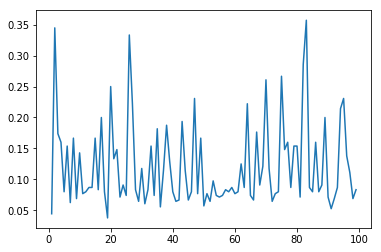

In [84]:
import matplotlib.pyplot as plt
x=[]
y=[]
for i in range(1,100):
    x.append(i)
    y.append(scor[i])        


plt.plot(x, y)
plt.show()